# Cosmic Ray Proton Spectrum up to the Knee

In [377]:
from pylab import *
from scipy.optimize import minimize 

In [378]:
m_p = 0.938 # Proton mass
Z = 1 # Proton charge
n = 1 # Number of nucleons in H

## PAMELA data from Adriani et al., Science 332, 69 (2011)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<R>$ (GV) $\quad$ [2] Bin range $\quad$ [3] Flux (per R bin)  (GV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err

In [379]:
data_PAMELA_H = np.genfromtxt("Fitting/Data/Proton/PAMELA_H_data.txt")
R_PAMELA = data_PAMELA_H[:,1]
E_PAMELA = (R_PAMELA * Z) - m_p
flux_R_PAMELA = data_PAMELA_H[:,3]
flux_PAMELA = flux_R_PAMELA * (R_PAMELA / ((Z * R_PAMELA) - m_p)) # Normalize to Ek
error_PAMELA_stat = data_PAMELA_H[:,4] * (R_PAMELA / ((Z * R_PAMELA) - m_p)) # Normalize to Ek
error_PAMELA_syst = data_PAMELA_H[:,5] * (R_PAMELA / ((Z * R_PAMELA) - m_p)) # Normalize to Ek
error_PAMELA = np.sqrt(error_PAMELA_stat**2 + error_PAMELA_syst**2) 

## AMS02 data from Aguilar et al., PRL 114, 171103 (2015)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<R>$ (GV) $\quad$ [2] Bin range $\quad$ [3] Flux (per R bin)  (GV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err 

In [380]:
data_AMS02_H = np.genfromtxt("Fitting/Data/Proton/AMS02_H_data.txt")
R_AMS02 = data_AMS02_H[:,1]
E_AMS02 = (R_AMS02 * Z) - m_p
flux_R_AMS02 = data_AMS02_H[:,3]
flux_AMS02 = flux_R_AMS02 * (R_AMS02 / ((Z * R_AMS02) - m_p)) # Normalize to Ek
error_AMS02_stat = data_AMS02_H[:,4] * (R_AMS02 / ((Z * R_AMS02) - m_p)) # Normalize to Ek
error_AMS02_syst = data_AMS02_H[:,5] * (R_AMS02 / ((Z * R_AMS02) - m_p)) # Normalize to Ek
error_AMS02 = np.sqrt(error_AMS02_stat**2 + error_AMS02_syst**2)

## DAMPE data from An et al., SciA 5, eaax3793 (2019)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<Ek>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per Ek bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err

In [381]:
data_DAMPE_H = np.genfromtxt("Fitting/Data/Proton/DAMPE_H_data.txt")
E_DAMPE = data_DAMPE_H[:,1]
flux_DAMPE = data_DAMPE_H[:,3]
error_DAMPE_stat = data_DAMPE_H[:,4]
error_DAMPE_syst = data_DAMPE_H[:,5]
error_DAMPE = np.sqrt(error_DAMPE_stat**2 + error_DAMPE_syst**2)

## CALET data from Adriani et al., PhRvL 122, 181102 (2019)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<Ek>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per Ek bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err (-) $\quad$ [6] Syst Err (+)

In [382]:
data_CALET_H = np.genfromtxt("Fitting/Data/Proton/CALET_H_data.txt")
E_CALET = data_CALET_H[:,1]
flux_CALET = data_CALET_H[:,3]
error_CALET_stat = data_CALET_H[:,4]
error_CALET_syst_low = data_CALET_H[:,5]
error_CALET_syst_up = data_CALET_H[:,6]
error_CALET_low = np.sqrt(error_CALET_stat**2 + error_CALET_syst_low**2)
error_CALET_up = np.sqrt(error_CALET_stat**2 + error_CALET_syst_up**2)

## CREAM data from Yoon et al., ApJ 839, 5 (2017)
### Data sets colums
#### [0] Quantity $\quad$ [1] $<Ek/n>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per Ek/n bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err (-) $\quad$ [5] Stat Err (+) $\quad$ [6] Syst Err

In [383]:
data_CREAM_H = np.genfromtxt("Fitting/Data/Proton/CREAM_H_data.txt")
E_CREAM = data_CREAM_H[:,1] * n
flux_CREAM = data_CREAM_H[:,3] / n
error_CREAM_stat_low = data_CREAM_H[:,4] / n
error_CREAM_stat_up = data_CREAM_H[:,5] / n
error_CREAM_syst = data_CREAM_H[:,6] / n
error_CREAM_low = np.sqrt(error_CREAM_stat_low**2 + error_CREAM_syst**2)
error_CREAM_up = np.sqrt(error_CREAM_stat_up**2 + error_CREAM_syst**2)

## ATIC data from Panov et al., Bull. Russian Acad. Sci. 73, 564 (2009)
### Data sets colums
#### [0] Quantity $\quad$ [1] $<Etot>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per Etot bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err 

In [384]:
data_ATIC_H = np.genfromtxt("Fitting/Data/Proton/ATIC_H_data.txt")
E_ATIC = data_ATIC_H[:,1] - m_p
flux_ATIC = data_ATIC_H[:,3] * (E_ATIC / (E_ATIC - m_p)) # Normalize to Ek
error_ATIC_stat = data_ATIC_H[:,4] * (E_ATIC / (E_ATIC - m_p)) # Normalize to Ek
error_ATIC_syst = data_ATIC_H[:,3]*0.2 * (E_ATIC / (E_ATIC - m_p)) # Estimated systemtaic error of 20%
error_ATIC = np.sqrt(error_ATIC_stat**2 + error_ATIC_syst**2)

## NUCLEON data from Grebenyuk et al., AdSpR 64, 2546 (2019)
### Data sets colums
#### [0] Quantity $\quad$ [1] $<Etot>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per Etot bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err

In [385]:
data_NUCLEON_H = np.genfromtxt("Fitting/Data/Proton/NUCLEON_H_data.txt")
E_NUCLEON = data_NUCLEON_H[:,1] #- m_p
flux_NUCLEON = data_NUCLEON_H[:,3] * (E_NUCLEON / (E_NUCLEON - m_p)) # Normalize to Ek
error_NUCLEON_stat = data_NUCLEON_H[:,4] * (E_NUCLEON / (E_NUCLEON - m_p)) # Normalize to Ek
error_NUCLEON_syst = data_NUCLEON_H[:,3]*0.25 * (E_NUCLEON / (E_NUCLEON - m_p)) # Estimated systemtaic error of 25%
error_NUCLEON = np.sqrt(error_NUCLEON_stat**2 + error_NUCLEON_syst**2)

## IceCube data from Aartsen et al., PhRvD 100, 082002 (2019)
#### *Using SIBYLL2.1*
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<Etot>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per Etot bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err (-)$\quad$ [5] Stat Err (+) $\quad$ [6] Syst Err (-) $\quad$ [7] Syst Err (+)

In [386]:
data_ICECUBE_H = np.genfromtxt("Fitting/Data/Proton/ICECUBE_H_data.txt")
E_ICECUBE = data_ICECUBE_H[:,1] - m_p
flux_ICECUBE = data_ICECUBE_H[:,3] * (E_ICECUBE / (E_ICECUBE - m_p)) # Normalize to Ek
error_ICECUBE_stat_low = data_ICECUBE_H[:,4] * (E_ICECUBE / (E_ICECUBE - m_p)) # Normalize to Ek
error_ICECUBE_stat_up = data_ICECUBE_H[:,4] * (E_ICECUBE / (E_ICECUBE - m_p)) # Normalize to Ek
error_ICECUBE_syst_low = data_ICECUBE_H[:,4] * (E_ICECUBE / (E_ICECUBE - m_p)) # Normalize to Ek
error_ICECUBE_syst_up = data_ICECUBE_H[:,4] * (E_ICECUBE / (E_ICECUBE - m_p)) # Normalize to Ek
error_ICECUBE_low = np.sqrt(error_ICECUBE_stat_low**2 + error_ICECUBE_syst_low**2)
error_ICECUBE_up = np.sqrt(error_ICECUBE_stat_up**2 + error_ICECUBE_syst_up**2)

## KASCADE data from Antoni et al., APh 24, 1 (2005)
#### *Using QGSJet01*
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<Etot>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per Etot bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$  [5] Syst Err 
#### *Using Sibyll 2.1*
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<Etot>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per Etot bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err (-) $\quad$ [5] Stat Err (+) $\quad$  [6] Syst Err 

In [387]:
data_KASCADE_H_2005GQS = np.genfromtxt("Fitting/Data/Proton/KASCADE_H_data_QGSJet01.txt")
E_KASCADE_H_2005GQS = data_KASACDE_H_2005GQS[:,1] - m_p
flux_KASCADE_H_2005GQS = data_KASACDE_H_2005GQS[:,3]
error_KASCADE_H_2005GQS = data_KASACDE_H_2005GQS[:,4]

In [388]:
data_KASCADE_H_2005Sibyll = np.genfromtxt("Fitting/Data/Proton/KASCADE_H_data_Sibyll2.1.txt")
E_KASCADE_2005Sibyll = data_KASCADE_H_2005Sibyll[:,1] - m_p
flux_KASCADE_2005Sibyll = data_KASCADE_H_2005Sibyll[:,3] * (E_KASCADE_2005Sibyll / (E_KASCADE_2005Sibyll - m_p)) # Normalize to Ek
error_KASCADE_2005Sibyll_low = data_KASCADE_H_2005Sibyll[:,4] * (E_KASCADE_2005Sibyll / (E_KASCADE_2005Sibyll - m_p)) # Normalize to Ek
error_KASCADE_2005Sibyll_up = data_KASCADE_H_2005Sibyll[:,5] * (E_KASCADE_2005Sibyll / (E_KASCADE_2005Sibyll - m_p)) # Normalize to Ek

## KASCADE-Grande data from W. D. Apel et al., Astropart. Phys. 47, 54 (2013) 
#### *Using QGSJet-II-2*
### Data sets columns:
#### [0] $<Etot>$ (GeV) $\quad$ [1] Flux (per Etot bin)  (GeV m2 s sr)-1 $\quad$ [2] Stat Err $\quad$  [3] Syst Err 

In [389]:
data_KASCADE_H_2013GQS = np.genfromtxt("Fitting/Data/Proton/KASCADEGRANDE_H_data_QGSJet2.txt")
E_KASCADE_H_2013GQS = data_KASCADE_H_2013GQS[:,0] - m_p
flux_KASCADE_H_2013GQS = data_KASCADE_H_2013GQS[:,1]
error_KASCADE_H_2013GQS = data_KASCADE_H_2013GQS[:,2]

## Plotting spectrum

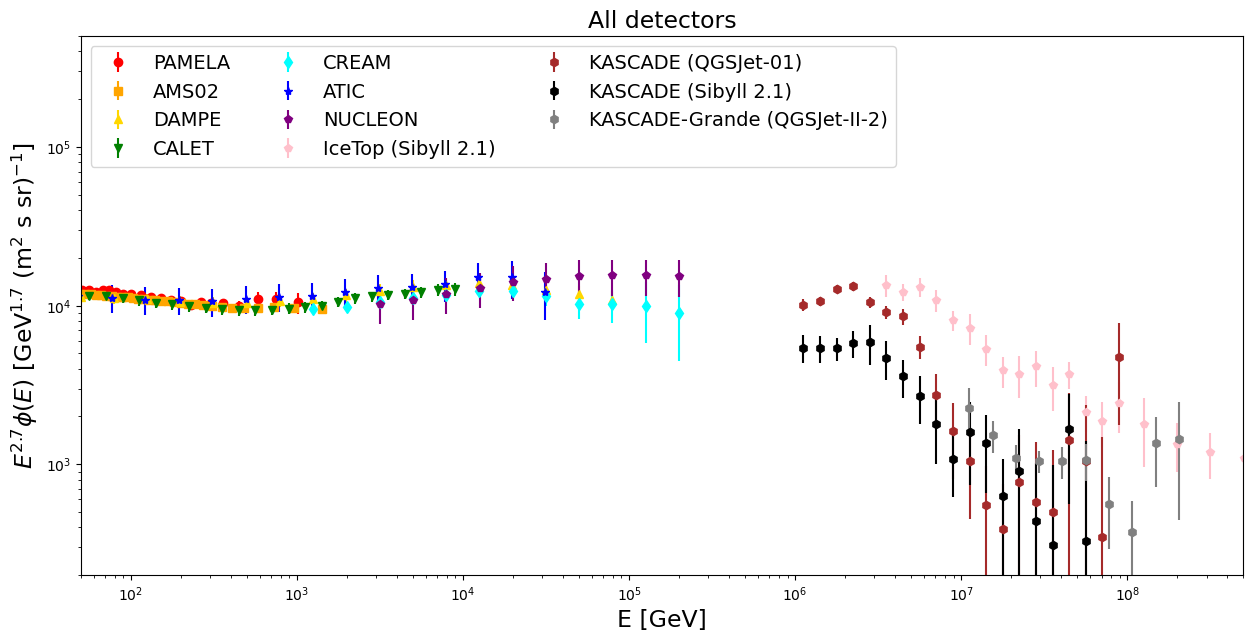

In [390]:
plt.figure(figsize=(15, 7))
# Low energy
plt.errorbar(E_PAMELA, flux_PAMELA * E_PAMELA**2.7, yerr=error_PAMELA * E_PAMELA**2.7, fmt='o', color='red', label='PAMELA')
plt.errorbar(E_AMS02, flux_AMS02 * E_AMS02**2.7, yerr=error_AMS02 * E_AMS02**2.7, fmt='s', color='orange', label='AMS02')
plt.errorbar(E_DAMPE, flux_DAMPE * E_DAMPE**2.7, yerr=error_DAMPE * E_DAMPE**2.7, fmt='^', color='gold', label='DAMPE')
plt.errorbar(E_CALET, flux_CALET * E_CALET**2.7, yerr=(error_CALET_low, error_CALET_low) * E_CALET**2.7, fmt='v', color='green', label='CALET')
plt.errorbar(E_CREAM, flux_CREAM * E_CREAM**2.7, yerr=(error_CREAM_low, error_CREAM_low) * E_CREAM**2.7, fmt='d', color='cyan', label='CREAM')
plt.errorbar(E_ATIC, flux_ATIC * E_ATIC**2.7, yerr=error_ATIC * E_ATIC**2.7, fmt='*', color='blue', label='ATIC')
plt.errorbar(E_NUCLEON, flux_NUCLEON * E_NUCLEON**2.7, yerr=error_NUCLEON * E_NUCLEON**2.7, fmt='p', color='purple', label='NUCLEON')
# High energy
plt.errorbar(E_ICECUBE, flux_ICECUBE * E_ICECUBE**2.7, yerr=error_ICECUBE * E_ICECUBE**2.7, fmt='p', color='pink', label='IceTop (Sibyll 2.1)')
plt.errorbar(E_KASCADE_H_2005GQS, flux_KASCADE_H_2005GQS * E_KASCADE_H_2005GQS**2.7, yerr=error_KASCADE_H_2005GQS * E_KASCADE_H_2005GQS**2.7, fmt='h', color='brown', label='KASCADE (QGSJet-01)')
plt.errorbar(E_KASCADE_H_2005Sibyll, flux_KASCADE_H_2005Sibyll * E_KASCADE_H_2005Sibyll**2.7, yerr=(error_KASCADE_H_2005Sibyll_low, error_KASCADE_H_2005Sibyll_up) * E_KASCADE_H_2005Sibyll**2.7, fmt='h', color='black', label='KASCADE (Sibyll 2.1)')
#plt.errorbar(E_KASCADE_H_2017Sibyll, flux_KASCADE_H_2017Sibyll * E_KASCADE_H_2017Sibyll**2.7, yerr=error_KASCADE_H_2017Sibyll * E_KASCADE_H_2017Sibyll**2.7, fmt='h', color='gray', label='KASCADE-Grande (Sibyll 2.3)')
plt.errorbar(E_KASCADE_H_2013GQS, flux_KASCADE_H_2013GQS * E_KASCADE_H_2013GQS**2.7, yerr=error_KASCADE_H_2013GQS * E_KASCADE_H_2013GQS**2.7, fmt='h', color='gray', label='KASCADE-Grande (QGSJet-II-2)')
plt.loglog()
plt.xlim(5e1,5e8)
plt.ylim(2e2,5e5)
plt.xlabel('E [GeV]', fontsize=17)
plt.ylabel(r'$E^{2.7}\phi(E)$ [GeV$^{1.7}$ (m$^2$ s sr)$^{-1}$]', fontsize=17)
plt.legend(ncol=3, fontsize=14, loc='upper left')
plt.title('All detectors', fontsize=17)
plt.savefig('Plots/spectrum_high_energy.png')

### Select energy range for fit

In [391]:
# Consider E > 50 GeV
index_PAMELA = np.where(np.logical_and(E_PAMELA>=5e1, E_PAMELA<=1e5))
E_PAMELA = E_PAMELA[index_PAMELA]; flux_PAMELA = flux_PAMELA[index_PAMELA]; error_PAMELA = error_PAMELA[index_PAMELA]
print('Number of data points:', len(E_PAMELA))

Number of data points: 21


In [392]:
# Consider E > 50 GeV
index_AMS02 = np.where(np.logical_and(E_AMS02>=5e1, E_AMS02<=1e5))
E_AMS02 = E_AMS02[index_AMS02]; flux_AMS02 = flux_AMS02[index_AMS02]; error_AMS02 = error_AMS02[index_AMS02]
print('Number of data points:', len(E_AMS02))

Number of data points: 29


In [393]:
# Consider E > 50 GeV
index_ATIC = np.where(np.logical_and(E_ATIC>=5e1, E_ATIC<=1e5))
E_ATIC = E_ATIC[index_ATIC]; flux_ATIC = flux_ATIC[index_ATIC]; error_ATIC = error_ATIC[index_ATIC]
print('Number of data points:', len(E_ATIC))

Number of data points: 14


In [394]:
# Consider E > 50 GeV
index_CALET = np.where(np.logical_and(E_CALET>=5e1, E_CALET<=1e5))
E_CALET = E_CALET[index_CALET]; flux_CALET = flux_CALET[index_CALET]; error_CALET_low = error_CALET_low[index_CALET]; error_CALET_up = error_CALET_up[index_CALET]
print('Number of data points:', len(E_CALET))

Number of data points: 23


In [395]:
# Consider E > 50 GeV
index_CREAM = np.where(np.logical_and(E_CREAM>=5e1, E_CREAM<=5e5))
E_CREAM = E_CREAM[index_CREAM]; flux_CREAM = flux_CREAM[index_CREAM]; error_CREAM_low = error_CREAM_low[index_CREAM]; error_CREAM_up = error_CREAM_up[index_CREAM]
print('Number of data points:', len(E_CREAM))

Number of data points: 12


In [396]:
# Consider E > 50 GeV
index_DAMPE = np.where(np.logical_and(E_DAMPE>=5e1, E_DAMPE<=1e5))
E_DAMPE = E_DAMPE[index_DAMPE]; flux_DAMPE = flux_DAMPE[index_DAMPE]; error_DAMPE = error_DAMPE[index_DAMPE]
print('Number of data points:', len(E_DAMPE))

Number of data points: 16


In [397]:
# Consider E > 50 GeV
index_ICECUBE = np.where(np.logical_and(E_ICECUBE>=5e1, E_ICECUBE<=1e9))
E_ICECUBE = E_ICECUBE[index_ICECUBE]; flux_ICECUBE = flux_ICECUBE[index_ICECUBE]; error_ICECUBE = error_ICECUBE[index_ICECUBE]
print('Number of data points:', len(E_ICECUBE))

Number of data points: 20


In [398]:
# Consider E > 50 GeV
index_KASCADE_2005Sibyll = np.where(np.logical_and(E_KASCADE_2005Sibyll>=5e1, E_KASCADE_2005Sibyll<=7e7))
E_KASCADE_2005Sibyll = E_KASCADE_2005Sibyll[index_KASCADE_2005Sibyll]; flux_KASCADE_2005Sibyll = flux_KASCADE_2005Sibyll[index_KASCADE_2005Sibyll]
error_KASCADE_2005Sibyll_low = error_KASCADE_2005Sibyll_low[index_KASCADE_2005Sibyll]; error_KASCADE_2005Sibyll_up = error_KASCADE_2005Sibyll_up[index_KASCADE_2005Sibyll]
print('Number of data points:', len(E_KASCADE_2005Sibyll))

Number of data points: 18


# MODEL A
## Four spectral breaks using HE data by IceTop (Sibyll 2.1) 

In [365]:
def Phi_A(E, K, E0, alpha1, alpha2, alpha3, alpha4, alpha5, omega1, omega2, omega3, omega4, Eb1, Eb2, Eb3, Eb4):
    delta1 = alpha2 - alpha1
    delta2 = alpha3 - alpha2
    delta3 = alpha4 - alpha3
    delta4 = alpha5 - alpha4
    return K * (E/E0)**(-alpha3) * (1 + (E/Eb1)**(1/omega1))**(-delta1 * omega1) * (1 + (E/Eb2)**(1/omega2))**(-delta2 * omega2) * (1 + (E/Eb3)**(1/omega3))**(-delta3 * omega3) * (1 + (E/Eb4)**(1/omega4))**(-delta4 * omega4)

In [400]:
# Joint chi^2
def Chi_A(parameters):
    K, alpha1, alpha2, alpha3, alpha4, alpha5, omega1, omega2, omega3, omega4, Eb1, Eb2, Eb3, Eb4 = parameters
    
    E = np.append( np.append( np.append( np.append( np.append( np.append(E_PAMELA, E_AMS02), E_ATIC ), E_CREAM), E_CALET), E_DAMPE), E_ICECUBE)
    Flux = np.append( np.append( np.append( np.append( np.append( np.append(flux_PAMELA, flux_AMS02), flux_ATIC ), flux_CREAM), flux_CALET), flux_DAMPE), flux_ICECUBE)
    Sigma = np.append( np.append( np.append( np.append( np.append( np.append(2*error_PAMELA, 2*error_AMS02), 2*error_ATIC ), error_CREAM_low+error_CREAM_up), error_CALET_low+error_CALET_up), 2*error_DAMPE), 2*error_ICECUBE)
    
    Phi_model = Phi_A(E, K, 0.1 * 1e3, alpha1, alpha2, alpha3, alpha4, alpha5, omega1, omega2, omega3, omega4, Eb1, Eb2, Eb3, Eb4)
    
    return sum( (Phi_model - Flux)**2 / Sigma**2 ) 

In [402]:
# Joint chi^2
def Chi_A2(parameters):
    K, alpha1, alpha2, alpha3, alpha4, alpha5, omega1, omega2, omega3, omega4, Eb1, Eb2, Eb3, Eb4 = parameters
    
    E = np.append( np.append( np.append( np.append( np.append( np.append(E_PAMELA, E_AMS02), E_ATIC ), E_CREAM), E_CALET), E_DAMPE), E_KASCADE_2005Sibyll)
    Flux = np.append( np.append( np.append( np.append( np.append( np.append(flux_PAMELA, flux_AMS02), flux_ATIC ), flux_CREAM), flux_CALET), flux_DAMPE), flux_KASCADE_2005Sibyll)
    Sigma = np.append( np.append( np.append( np.append( np.append( np.append(2*error_PAMELA, 2*error_AMS02), 2*error_ATIC ), error_CREAM_low+error_CREAM_up), error_CALET_low+error_CALET_up), 2*error_DAMPE),  error_KASCADE_2005Sibyll_low+error_KASCADE_2005Sibyll_up)
    
    Phi_model = Phi_A(E, K, 0.1 * 1e3, alpha1, alpha2, alpha3, alpha4, alpha5, omega1, omega2, omega3, omega4, Eb1, Eb2, Eb3, Eb4)
    
    return sum( (Phi_model - Flux)**2 / Sigma**2 ) 

In [403]:
# Initial guesses
alpha1_bestfit = 2.805
alpha2_bestfit = 2.56
alpha3_bestfit = 2.874
alpha4_bestfit = 2.7
alpha5_bestfit = 3.1
Eb1_bestfit = 0.67 * 1e3 #GeV
Eb2_bestfit = 16 * 1e3 #GeV
Eb3_bestfit = 0.2 * 1e6 #GeV
Eb4_bestfit = 10 * 1e6 #GeV
omega1_bestfit = 0.28
omega2_bestfit = 0.163
omega3_bestfit = 0.1
omega4_bestfit = 0.1
K_bestfit = 4.46 * 10**(-2) #(GeV m2 s sr)-1

# Minimization of chi^2
output = minimize(Chi_A, (K_bestfit, alpha1_bestfit, alpha2_bestfit, alpha3_bestfit, alpha4_bestfit, alpha5_bestfit, omega1_bestfit, omega2_bestfit, omega3_bestfit, omega4_bestfit, Eb1_bestfit, Eb2_bestfit, Eb3_bestfit, Eb4_bestfit), method='L-BFGS-B')
best_fit_values = output['x']
print('Success:', output['success'])

Success: True


In [404]:
# Best fit values
print('MY BEST FIT VALUES:')
# Normalization
print('K:', round(best_fit_values[0],7)); 
# Spectral indices
print('alpha_1:', round(best_fit_values[1],3)); print('alpha_2:', round(best_fit_values[2],3)); 
print('alpha_3:', round(best_fit_values[3],3)); print('alpha_4:', round(best_fit_values[4],3));
print('alpha_5:', round(best_fit_values[5],3))
# Widths
print('omega1:', round(best_fit_values[6],3)); print('omega2:', round(best_fit_values[7],3)); 
print('omega3:', round(best_fit_values[8],3)); print('omega4:', round(best_fit_values[9],3)); 
# Energies
print('E1:', round(best_fit_values[10],3), 'GeV'); print('E2:', round(best_fit_values[11],3)/1e3, 'TeV')
print('E3:', round(best_fit_values[12]/1e6,3), 'PeV'); print('E4:', round(best_fit_values[13]/1e6,3), 'PeV')

print('')

min_chi = Chi_A(best_fit_values)
print('chi^2_min:', round(min_chi,7))
print('N_dof:', len(E_PAMELA) + len(E_AMS02) + len(E_ATIC) + len(E_CREAM) + len(E_CALET) + len(E_DAMPE) + len(E_ICECUBE))

MY BEST FIT VALUES:
K: 0.0453846
alpha_1: 2.963
alpha_2: 2.705
alpha_3: 2.8
alpha_4: 2.118
alpha_5: 4.782
omega1: 0.368
omega2: 0.067
omega3: 0.097
omega4: 2.014
E1: 670.001 GeV
E2: 16.0 TeV
E3: 0.2 PeV
E4: 10.0 PeV

chi^2_min: 22.3214819
N_dof: 135


In [414]:
# Initial guesses
alpha1_bestfit = 2.805
alpha2_bestfit = 2.56
alpha3_bestfit = 2.874
alpha4_bestfit = 2.7
alpha5_bestfit = 3.1
Eb1_bestfit = 0.67 * 1e3 #GeV
Eb2_bestfit = 16 * 1e3 #GeV
Eb3_bestfit = 0.2 * 1e6 #GeV
Eb4_bestfit = 10 * 1e6 #GeV
omega1_bestfit = 0.28
omega2_bestfit = 0.163
omega3_bestfit = 0.1
omega4_bestfit = 0.1
K_bestfit = 4.46 * 10**(-2) #(GeV m2 s sr)-1

# Minimization of chi^2
output2 = minimize(Chi_A2, (K_bestfit, alpha1_bestfit, alpha2_bestfit, alpha3_bestfit, alpha4_bestfit, alpha5_bestfit, omega1_bestfit, omega2_bestfit, omega3_bestfit, omega4_bestfit, Eb1_bestfit, Eb2_bestfit, Eb3_bestfit, Eb4_bestfit), method='L-BFGS-B')
best_fit_values2 = output2['x']
print('Success:', output2['success'])

min_chi2 = Chi_A2(best_fit_values2)
print('chi^2_min:', round(min_chi2,7))
print('N_dof:', len(E_PAMELA) + len(E_AMS02) + len(E_ATIC) + len(E_CREAM) + len(E_CALET) + len(E_DAMPE) + len(E_KASCADE_2005Sibyll))

Success: True
chi^2_min: 17.1141532
N_dof: 133


/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_19160/117106144.py:6: RuntimeWarning: overflow encountered in power
  return K * (E/E0)**(-alpha3) * (1 + (E/Eb1)**(1/omega1))**(-delta1 * omega1) * (1 + (E/Eb2)**(1/omega2))**(-delta2 * omega2) * (1 + (E/Eb3)**(1/omega3))**(-delta3 * omega3) * (1 + (E/Eb4)**(1/omega4))**(-delta4 * omega4)


/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_19160/117106144.py:6: RuntimeWarning: overflow encountered in power
  return K * (E/E0)**(-alpha3) * (1 + (E/Eb1)**(1/omega1))**(-delta1 * omega1) * (1 + (E/Eb2)**(1/omega2))**(-delta2 * omega2) * (1 + (E/Eb3)**(1/omega3))**(-delta3 * omega3) * (1 + (E/Eb4)**(1/omega4))**(-delta4 * omega4)


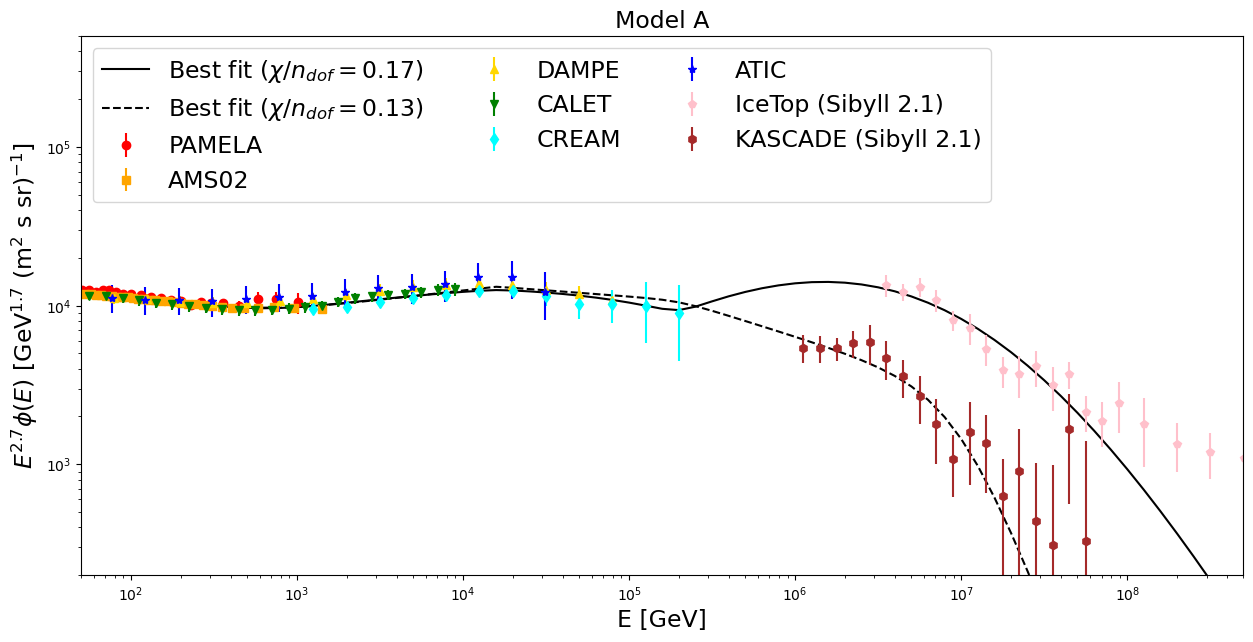

In [415]:
logE = np.arange(0,9,0.1)
E = 10**logE
Phi_model = Phi_A(E, best_fit_values[0], 0.1 * 1e3, best_fit_values[1], best_fit_values[2], best_fit_values[3], best_fit_values[4], best_fit_values[5], best_fit_values[6], best_fit_values[7], best_fit_values[8], best_fit_values[9], best_fit_values[10], best_fit_values[11], best_fit_values[12], best_fit_values[13])
Phi_model2 = Phi_A(E, best_fit_values2[0], 0.1 * 1e3, best_fit_values2[1], best_fit_values2[2], best_fit_values2[3], best_fit_values2[4], best_fit_values2[5], best_fit_values2[6], best_fit_values2[7], best_fit_values2[8], best_fit_values2[9], best_fit_values2[10], best_fit_values2[11], best_fit_values2[12], best_fit_values2[13])
plt.figure(figsize=(15, 7))
# Model
plt.plot(E, Phi_model * E**2.7, color='black', label=r'Best fit ($\chi / n_{dof} = 0.17$)')
plt.plot(E, Phi_model2 * E**2.7, linestyle='--', color='black', label=r'Best fit ($\chi / n_{dof} = 0.13$)')
# Low energy
plt.errorbar(E_PAMELA, flux_PAMELA * E_PAMELA**2.7, yerr=error_PAMELA * E_PAMELA**2.7, fmt='o', color='red', label='PAMELA')
plt.errorbar(E_AMS02, flux_AMS02 * E_AMS02**2.7, yerr=error_AMS02 * E_AMS02**2.7, fmt='s', color='orange', label='AMS02')
plt.errorbar(E_DAMPE, flux_DAMPE * E_DAMPE**2.7, yerr=error_DAMPE * E_DAMPE**2.7, fmt='^', color='gold', label='DAMPE')
plt.errorbar(E_CALET, flux_CALET * E_CALET**2.7, yerr=(error_CALET_low, error_CALET_low) * E_CALET**2.7, fmt='v', color='green', label='CALET')
plt.errorbar(E_CREAM, flux_CREAM * E_CREAM**2.7, yerr=(error_CREAM_low, error_CREAM_low) * E_CREAM**2.7, fmt='d', color='cyan', label='CREAM')
plt.errorbar(E_ATIC, flux_ATIC * E_ATIC**2.7, yerr=error_ATIC * E_ATIC**2.7, fmt='*', color='blue', label='ATIC')
#plt.errorbar(E_NUCLEON, flux_NUCLEON * E_NUCLEON**2.7, yerr=error_NUCLEON * E_NUCLEON**2.7, fmt='p', color='purple', label='NUCLEON')
# High energy
plt.errorbar(E_ICECUBE, flux_ICECUBE * E_ICECUBE**2.7, yerr=error_ICECUBE * E_ICECUBE**2.7, fmt='p', color='pink', label='IceTop (Sibyll 2.1)')
plt.errorbar(E_KASCADE_H_2005Sibyll, flux_KASCADE_H_2005Sibyll * E_KASCADE_H_2005Sibyll**2.7, yerr=(error_KASCADE_H_2005Sibyll_low, error_KASCADE_H_2005Sibyll_up) * E_KASCADE_H_2005Sibyll**2.7, fmt='h', color='brown', label='KASCADE (Sibyll 2.1)')
plt.loglog()
plt.xlim(5e1,5e8)
plt.ylim(2e2,5e5)
plt.xlabel('E [GeV]', fontsize=17)
plt.ylabel(r'$E^{2.7}\phi(E)$ [GeV$^{1.7}$ (m$^2$ s sr)$^{-1}$]', fontsize=17)
plt.legend(ncol=3, fontsize=17, loc='upper left')
plt.title('Model A', fontsize=17)
plt.savefig('Plots/knee_modelA_fit.png')

# MODEL B
## Three spectral breaks using HE data by KASCADE (Sibyll 2.1) 

In [416]:
def Phi_B(E, K, E0, alpha1, alpha2, alpha3, alpha4, omega1, omega2, omega3, Eb1, Eb2, Eb3):
    delta1 = alpha2 - alpha1
    delta2 = alpha3 - alpha2
    delta3 = alpha4 - alpha3
    return K * (E/E0)**(-alpha3) * (1 + (E/Eb1)**(1/omega1))**(-delta1 * omega1) * (1 + (E/Eb2)**(1/omega2))**(-delta2 * omega2) * (1 + (E/Eb3)**(1/omega3))**(-delta3 * omega3)

In [418]:
# Joint chi^2
def Chi_B(parameters):
    K, alpha1, alpha2, alpha3, alpha4, omega1, omega2, omega3, Eb1, Eb2, Eb3 = parameters
    
    E = np.append( np.append( np.append( np.append( np.append( np.append(E_PAMELA, E_AMS02), E_ATIC ), E_CREAM), E_CALET), E_DAMPE), E_KASCADE_2005Sibyll)
    Flux = np.append( np.append( np.append( np.append( np.append( np.append(flux_PAMELA, flux_AMS02), flux_ATIC ), flux_CREAM), flux_CALET), flux_DAMPE), flux_KASCADE_2005Sibyll)
    Sigma = np.append( np.append( np.append( np.append( np.append( np.append(2*error_PAMELA, 2*error_AMS02), 2*error_ATIC ), error_CREAM_low+error_CREAM_up), error_CALET_low+error_CALET_up), 2*error_DAMPE), error_KASCADE_2005Sibyll_low+error_KASCADE_2005Sibyll_up)
    
    Phi_model = Phi_B(E, K, 0.1 * 1e3, alpha1, alpha2, alpha3, alpha4, omega1, omega2, omega3, Eb1, Eb2, Eb3)
    
    return sum( (Phi_model - Flux)**2 / Sigma**2 ) 

In [419]:
# Joint chi^2
def Chi_B2(parameters):
    K, alpha1, alpha2, alpha3, alpha4, omega1, omega2, omega3, Eb1, Eb2, Eb3 = parameters
    
    E = np.append( np.append( np.append( np.append( np.append( np.append(E_PAMELA, E_AMS02), E_ATIC ), E_CREAM), E_CALET), E_DAMPE), E_ICECUBE)
    Flux = np.append( np.append( np.append( np.append( np.append( np.append(flux_PAMELA, flux_AMS02), flux_ATIC ), flux_CREAM), flux_CALET), flux_DAMPE), flux_ICECUBE)
    Sigma = np.append( np.append( np.append( np.append( np.append( np.append(2*error_PAMELA, 2*error_AMS02), 2*error_ATIC ), error_CREAM_low+error_CREAM_up), error_CALET_low+error_CALET_up), 2*error_DAMPE), 2*error_ICECUBE)
    
    Phi_model = Phi_B(E, K, 0.1 * 1e3, alpha1, alpha2, alpha3, alpha4, omega1, omega2, omega3, Eb1, Eb2, Eb3)
    
    return sum( (Phi_model - Flux)**2 / Sigma**2 ) 

In [420]:
# Initial guesses
alpha1_bestfit = 2.805
alpha2_bestfit = 2.56
alpha3_bestfit = 2.874
alpha4_bestfit = 3.1
Eb1_bestfit = 0.67 * 1e3 #GeV
Eb2_bestfit = 16 * 1e3 #GeV
Eb3_bestfit = 1 * 1e6 #GeV
omega1_bestfit = 0.28
omega2_bestfit = 0.163
omega3_bestfit = 0.1
K_bestfit = 4.46 * 10**(-2) #(GeV m2 s sr)-1

# Minimization of chi^2
output = minimize(Chi_B, (K_bestfit, alpha1_bestfit, alpha2_bestfit, alpha3_bestfit, alpha4_bestfit, omega1_bestfit, omega2_bestfit, omega3_bestfit, Eb1_bestfit, Eb2_bestfit, Eb3_bestfit), method='L-BFGS-B')
best_fit_values = output['x']
print('Success:', output['success'])

Success: True


In [421]:
# Best fit values
print('MY BEST FIT VALUES:')
# Normalization
print('K:', round(best_fit_values[0],7)); 
# Spectral indices
print('alpha_1:', round(best_fit_values[1],3)); print('alpha_2:', round(best_fit_values[2],3)); 
print('alpha_3:', round(best_fit_values[3],3)); print('alpha_4:', round(best_fit_values[4],3))
# Widths
print('omega1:', round(best_fit_values[5],3)); print('omega2:', round(best_fit_values[6],3)); 
print('omega3:', round(best_fit_values[7],3))
# Energies
print('E1:', round(best_fit_values[8],3), 'GeV'); print('E2:', round(best_fit_values[9],3)/1e3, 'TeV')
print('E3:', round(best_fit_values[10]/1e6,3), 'PeV')

print('')

min_chi = Chi_B(best_fit_values)
print('chi^2_min:', round(min_chi,7))
print('N_dof:', len(E_PAMELA) + len(E_AMS02) + len(E_ATIC) + len(E_CREAM) + len(E_CALET) + len(E_DAMPE) + len(E_KASCADE_2005Sibyll))

MY BEST FIT VALUES:
K: 0.0445951
alpha_1: 2.82
alpha_2: 2.603
alpha_3: 2.807
alpha_4: 3.479
omega1: 0.34
omega2: 0.051
omega3: 0.546
E1: 670.001 GeV
E2: 16.0 TeV
E3: 1.0 PeV

chi^2_min: 16.9003201
N_dof: 133


In [423]:
# Initial guesses
alpha1_bestfit = 2.805
alpha2_bestfit = 2.56
alpha3_bestfit = 2.874
alpha4_bestfit = 3.1
Eb1_bestfit = 0.67 * 1e3 #GeV
Eb2_bestfit = 16 * 1e3 #GeV
Eb3_bestfit = 1 * 1e6 #GeV
omega1_bestfit = 0.28
omega2_bestfit = 0.163
omega3_bestfit = 0.1
K_bestfit = 4.46 * 10**(-2) #(GeV m2 s sr)-1

# Minimization of chi^2
output2 = minimize(Chi_B2, (K_bestfit, alpha1_bestfit, alpha2_bestfit, alpha3_bestfit, alpha4_bestfit, omega1_bestfit, omega2_bestfit, omega3_bestfit, Eb1_bestfit, Eb2_bestfit, Eb3_bestfit), method='L-BFGS-B')
best_fit_values2 = output2['x']
print('Success:', output2['success'])

min_chi2 = Chi_B2(best_fit_values)
print('chi^2_min:', round(min_chi2,7))
print('N_dof:', len(E_PAMELA) + len(E_AMS02) + len(E_ATIC) + len(E_CREAM) + len(E_CALET) + len(E_DAMPE) + len(E_ICECUBE))

Success: True
chi^2_min: 85.5632757
N_dof: 135


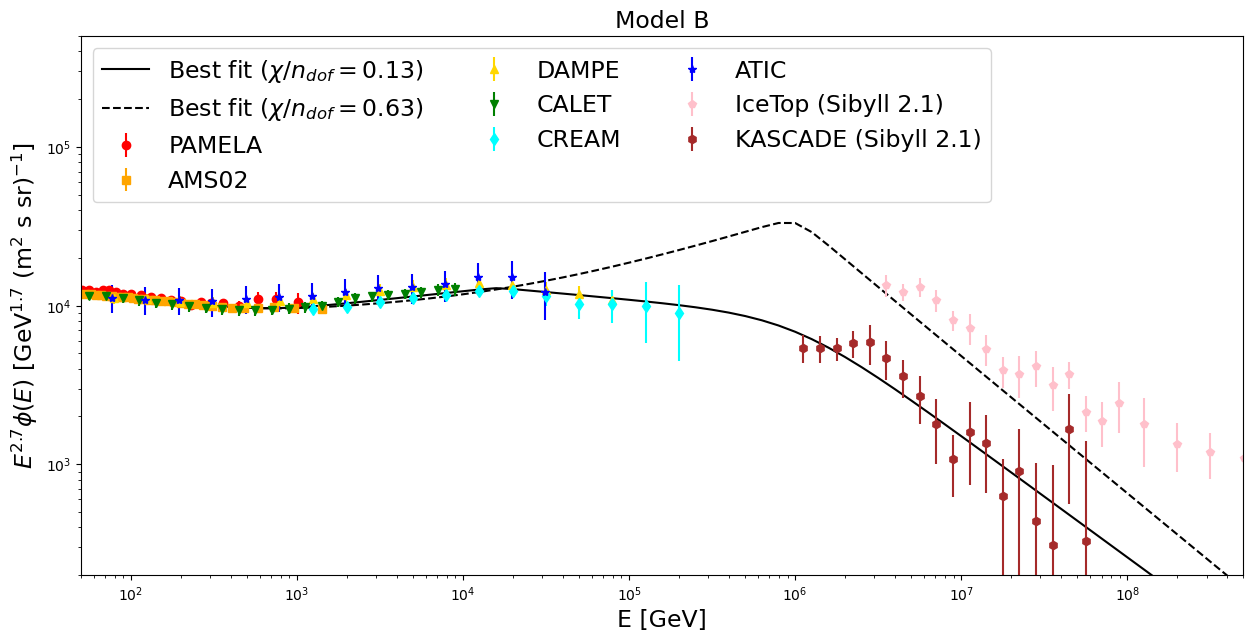

In [427]:
logE = np.arange(0,9,0.1)
E = 10**logE
Phi_model = Phi_B(E, best_fit_values[0], 0.1 * 1e3, best_fit_values[1], best_fit_values[2], best_fit_values[3], best_fit_values[4], best_fit_values[5], best_fit_values[6], best_fit_values[7], best_fit_values[8], best_fit_values[9], best_fit_values[10])
Phi_model2 = Phi_B(E, best_fit_values2[0], 0.1 * 1e3, best_fit_values2[1], best_fit_values2[2], best_fit_values2[3], best_fit_values2[4], best_fit_values2[5], best_fit_values2[6], best_fit_values2[7], best_fit_values2[8], best_fit_values2[9], best_fit_values2[10])
plt.figure(figsize=(15, 7))
# Model
plt.plot(E, Phi_model * E**2.7, color='black', label=r'Best fit ($\chi / n_{dof} = 0.13$)')
plt.plot(E, Phi_model2 * E**2.7, linestyle='--', color='black', label=r'Best fit ($\chi / n_{dof} = 0.63$)')
# Low energy
plt.errorbar(E_PAMELA, flux_PAMELA * E_PAMELA**2.7, yerr=error_PAMELA * E_PAMELA**2.7, fmt='o', color='red', label='PAMELA')
plt.errorbar(E_AMS02, flux_AMS02 * E_AMS02**2.7, yerr=error_AMS02 * E_AMS02**2.7, fmt='s', color='orange', label='AMS02')
plt.errorbar(E_DAMPE, flux_DAMPE * E_DAMPE**2.7, yerr=error_DAMPE * E_DAMPE**2.7, fmt='^', color='gold', label='DAMPE')
plt.errorbar(E_CALET, flux_CALET * E_CALET**2.7, yerr=(error_CALET_low, error_CALET_low) * E_CALET**2.7, fmt='v', color='green', label='CALET')
plt.errorbar(E_CREAM, flux_CREAM * E_CREAM**2.7, yerr=(error_CREAM_low, error_CREAM_low) * E_CREAM**2.7, fmt='d', color='cyan', label='CREAM')
plt.errorbar(E_ATIC, flux_ATIC * E_ATIC**2.7, yerr=error_ATIC * E_ATIC**2.7, fmt='*', color='blue', label='ATIC')
#plt.errorbar(E_NUCLEON, flux_NUCLEON * E_NUCLEON**2.7, yerr=error_NUCLEON * E_NUCLEON**2.7, fmt='p', color='purple', label='NUCLEON')
# High energy
plt.errorbar(E_ICECUBE, flux_ICECUBE * E_ICECUBE**2.7, yerr=error_ICECUBE * E_ICECUBE**2.7, fmt='p', color='pink', label='IceTop (Sibyll 2.1)')
plt.errorbar(E_KASCADE_H_2005Sibyll, flux_KASCADE_H_2005Sibyll * E_KASCADE_H_2005Sibyll**2.7, yerr=(error_KASCADE_H_2005Sibyll_low, error_KASCADE_H_2005Sibyll_up) * E_KASCADE_H_2005Sibyll**2.7, fmt='h', color='brown', label='KASCADE (Sibyll 2.1)')

plt.loglog()
plt.xlim(5e1,5e8)
plt.ylim(2e2,5e5)
plt.xlabel('E [GeV]', fontsize=17)
plt.ylabel(r'$E^{2.7}\phi(E)$ [GeV$^{1.7}$ (m$^2$ s sr)$^{-1}$]', fontsize=17)
plt.legend(ncol=3, fontsize=17, loc='upper left')
plt.title('Model B', fontsize=17)
plt.savefig('Plots/knee_modelB_fit.png')

array([-3.00000000e+00, -2.80000000e+00, -2.60000000e+00, -2.40000000e+00,
       -2.20000000e+00, -2.00000000e+00, -1.80000000e+00, -1.60000000e+00,
       -1.40000000e+00, -1.20000000e+00, -1.00000000e+00, -8.00000000e-01,
       -6.00000000e-01, -4.00000000e-01, -2.00000000e-01,  2.66453526e-15,
        2.00000000e-01,  4.00000000e-01,  6.00000000e-01,  8.00000000e-01,
        1.00000000e+00])